# Atividade 4

**Objetivo:**  
Desenvolver um programa em Python para *calcular as frequências naturais de vibração e os modos normais (deslocamentos relativos) de uma cadeia atômica finita com 2, 3 e 4 átomos*, incluindo interações com vizinhos mais distantes (segunda vizinhança) no último caso.

 
**Instruções:**
- Cadeia linear com 2 massas:  
    - Modele uma cadeia com duas massas $m_1$ e $m_2$ conectadas por uma mola de constante $k$.
    - Ambas as extremidades são livres (não ligadas a paredes).
    - Estude os efeitos da diferença entre $m_1$ e $m_2$ nas frequências e nos deslocamentos relativos.  

- Extensão para 3 massas:  
    - Conecte três massas em linha com molas entre elas.
    - Varie as massas e analise o comportamento vibracional do sistema.
    - Mantenha as extremidades livres.

- Extensão para 4 massas com inclusão de segunda vizinhança:  
    - Agora, modele uma cadeia com quatro massas $m_1$, $m_2$, $m_3$, $m_4$, conectadas por molas com constante $k$ entre vizinhos imediatos.
    - Adicione molas adicionais conectando pares de massas a duas posições de distância:
        - Entre $m_1$ e $m_3$;
        - Entre $m_2$ e $m_4$.
    - Use uma constante $k’$ para as molas de segunda vizinhança (ex: $k’ = 0.2k, 0.5k,$ etc.).

**Análise:**
- Como a presença de segunda vizinhança altera as frequências naturais
- Quais modos normais são mais afetados por essas interações adicionais.  
 

**Visualizações Recomendadas:**
- Gráficos das frequências naturais para cada configuração;
- Visualização dos modos normais (vetores de deslocamento);
- Comparação entre o caso com e sem interações de segunda vizinhança para 4 átomos.

**Entrega Esperada:**
- Código funcional e bem comentado
- Gráficos claros dos resultados
-Texto explicativo (até 300 palavras) discutindo:
    - O efeito da variação das massas;
    - O impacto da inclusão de segundos vizinhos;
    - A interpretação física das modificações observadas nos modos.

###### 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from vpython import *
import math as math
from scipy.linalg import eigh

<IPython.core.display.Javascript object>

## Casos particulares para 2, 3 e 4 massas com e sem $2^a$ vizinhança

$D_{j,j\pm 1} = \frac{-K_{j,j\pm 1}}{m_j}$, $\hspace{1cm}$   $D_{j, j} = \frac{K_{j, j-1} + K_{j, j+1}}{m_j}$

### D para n = 2

In [2]:
k, m1, m2 = 0.1, 1, 1 #constantes genéricas

M2 = np.vstack([
    np.full(2, 1/m1),
    np.full(2, 1/m2)])


D2 = np.array([[k/m1, -k/m1],
              [-k/m2, k/m2]])
valor, vetor = eigh(D2)
print(f"Matriz D: \n{D2} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

Matriz D: 
[[ 0.1 -0.1]
 [-0.1  0.1]] 
 
Frequências: [0.  0.2] 
 
Modos normais: 
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [3]:
def var_m1(m1, m2, k):
    M2 = np.vstack([
        np.full(2, 1/m1),
        np.full(2, 1/m2)])
    D2 = np.array([[k/m1, -k/m1],
                  [-k/m2, k/m2]])
    valor, vetor = eigh(D2)
    return valor, vetor

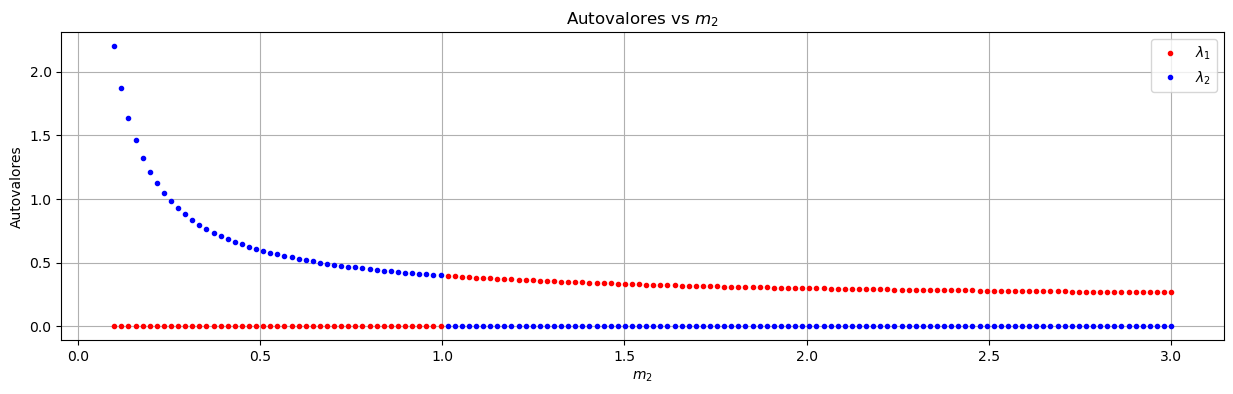

In [4]:
k = 0.2  # Constante da mola
m1 = 1.0  # Massa m1 fixa
m2_values = np.linspace(0.1, 3, 150)  # Varia m2

w_var = []

for m2 in m2_values:
    D = np.array([[k/m1, -k/m1], [-k/m2, k/m2]])
    eigvals = np.linalg.eigvals(D)
    w_var.append(eigvals)

w_var = np.array(w_var)

plt.figure(figsize=(15, 4))
plt.plot(m2_values, w_var[:, 0], label="$λ_1$", marker = '.', linestyle = 'none', color='r')
plt.plot(m2_values, w_var[:, 1], label="$λ_2$", marker = '.', linestyle = 'none', color='b')
plt.xlabel("$m_2$")
plt.ylabel("Autovalores")
plt.legend()
plt.title("Autovalores vs $m_2$")
plt.grid()
plt.show()

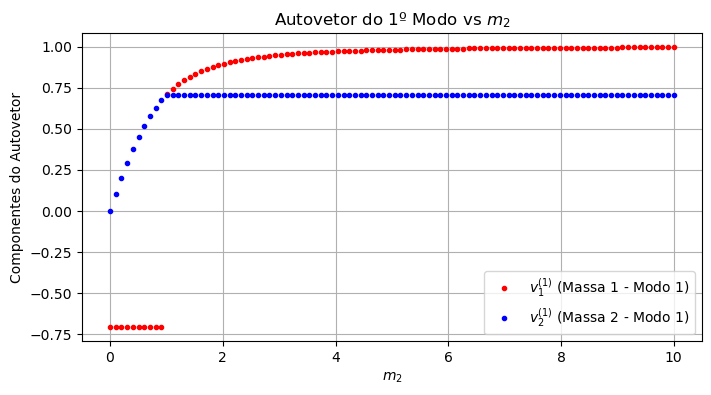

In [5]:
v_var = []
m2_values = np.linspace(0.001, 10, 100)

for m2 in m2_values:
    D = np.array([[k/m1, -k/m1], [-k/m2, k/m2]])
    _, eigvecs = np.linalg.eig(D)
    v_var.append(eigvecs)

v_var = np.array(v_var)

plt.figure(figsize=(8, 4))
plt.plot(m2_values, v_var[:, 0, 0], marker = '.', linestyle = 'none', color='r', label="$v_{1}^{(1)}$ (Massa 1 - Modo 1)")
plt.plot(m2_values, v_var[:, 0, 1], marker = '.', linestyle = 'none', color='b', label="$v_{2}^{(1)}$ (Massa 2 - Modo 1)")
plt.xlabel("$m_2$")
plt.ylabel("Componentes do Autovetor")
plt.legend()
plt.title("Autovetor do 1º Modo vs $m_2$")
plt.grid()
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_43423/792614438.py:9: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel("Autovalor ($\lambda$)")
/tmp/ipykernel_43423/792614438.py:9: SyntaxWarning: invalid escape sequence '\l'
  ax.set_ylabel("Autovalor ($\lambda$)")


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (100,) and arg 1 with shape (100, 2).

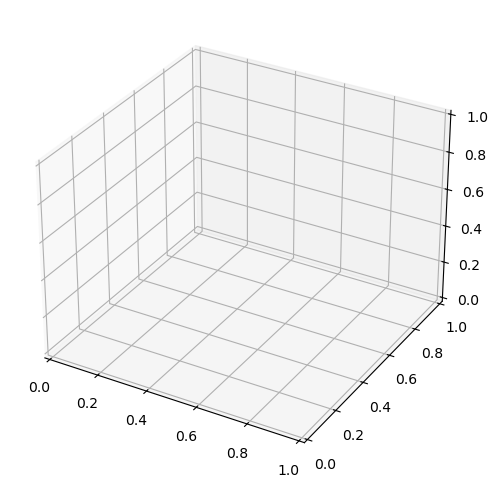

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(m2_values, v_var[:, 0], v_var[:, 0, 0], label="Modo 1")
ax.scatter(m2_values, v_var[:, 1], v_var[:, 1, 0], label="Modo 2")
ax.set_xlabel("$m_2$")
ax.set_ylabel("Autovalor ($\lambda$)")
ax.set_zlabel("Componente do Autovetor")
ax.legend()
plt.title("Relação entre $m_2$, Autovalores e Autovetores")
plt.show()

In [ ]:
massas = int(input("Qual o número de massas da cadeia? "))
m_var = float(input("Qual a massa m? "))
m = np.full(massas, m_var)  # Cria um array 1D com todas as massas iguais a m_var

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D corretamente
D = np.zeros((massas, massas))

# Preenche a matriz D (forma simétrica)
for i in range(massas):
    if massas == 1:
        D[i, i] = k1 / m[i]
    else:
        if i == 0:
            D[i, i] = k1 / m[i]
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  # Garante simetria
        elif i == massas - 1:
            D[i, i] = k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  # Garante simetria
        else:
            D[i, i] = 2 * k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  # Termo simétrico
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  # Termo simétrico

# Usa eigh para matrizes simétricas (mais estável)
autovalores, autovetores = eigh(D)  
#frequencias = np.sqrt(np.abs(autovalores))  # Autovalores devem ser >= 0

print(D)
print(f"Autovalores: {autovalores}")
#print(f"Frequências: {frequencias}")
print(f"Autovetores:\n{autovetores}")

[[ 0.1 -0.1]
 [-0.1  0.1]]
Autovalores: [0.  0.2]
Autovetores:
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [ ]:
#cria a matriz nula
massas = int(input("Qual o número de massas da cadeia?"))
m = []
for i in range(int(massas)): 
    m_var = input(f"Qual a massa m{i+1}?")
    m.append(float(m_var))
m = np.array(m)
m0 = np.zeros((massas, massas))
#agora substituimos k
k1 = float(input("Qual a constante elástica k?"))
if massas == 2: 
    D = np.array([[k1/m[0], -k1/m[0]],
                  [-k1/m[1], k1/m[1]]])
else:
    D = m0
    for j in range(n):
        # Diagonal
        Ke = K[j, j-1] if j > 0 else 0  # K_{j,j-1} (0 at boundary)
        Kd = K[j, j+1] if j < n-1 else 0  # K_{j,j+1} (0 at boundary)
        D[j, j] = (Ke + Kd) / m[j]

        # Off-diagonal elements D_{j,j±1}
        if j > 0:
            D[j, j-1] = -K[j, j-1] / m[j]  # D_{j,j-1}
        if j < n-1:
            D[j, j+1] = -K[j, j+1] / m[j]  # D_{j,j+1}

 


print(f"para {massas} massas m_i = {m} e constante elástica k={k1}, a matriz D é: \n{D}")
  


para 2 massas m_i = [1. 1.] e constante elástica k=0.1, a matriz D é: 
[[ 0.1 -0.1]
 [-0.1  0.1]]


In [ ]:
#cria a matriz nula
massas = int(input("Qual o número de massas da cadeia?"))
m = []
for i in range(int(massas)): 
    m_var = input(f"Qual a massa m{i+1}?")
    m.append(float(m_var))
m = np.array(m)
m0 = np.zeros((massas, massas))
#agora substituimos k
k1 = float(input("Qual a constante elástica k?"))
if massas == 2: 
    D = np.array([[k1/m[0], -k1/m[0]],
                  [-k1/m[1], k1/m[1]]])
else:
    D = m0
    for k in range(n-1):
        D[k, k+1] = -k1/m[k]
        D[k+1, k] = -k1/m[k+1]

    for j in range(n):
        if j == 0 or j == n-1:
            D[j, j] = k1/m[j]
        else:
            D[j, j] = (D[j, j-1] + D[j, j+1])/m[j]
newD = D        
    
 


print(f"para {massas} massas m_i = {m} e constante elástica k={k1}, a matriz D é: \n{newD}")

para 6 massas m_i = [1. 1. 1. 1. 1. 1.] e constante elástica k=3.0, a matriz D é: 
[[ 3. -3.  0.  0.  0.  0.]
 [-3. -6. -3.  0.  0.  0.]
 [ 0. -3. -6. -3.  0.  0.]
 [ 0.  0. -3.  3.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]


In [ ]:

# Cria a matriz nula
massas = int(input("Qual o número de massas da cadeia? "))
m = []
for i in range(int(massas)): 
    m_var = input(f"Qual a massa m{i+1}? ")
    m.append(float(m_var))
m = np.array(m)

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D com zeros
D = np.zeros((massas, massas))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(massas):
    if massas == 1:  # Caso especial com apenas 1 massa
        D[i, i] = k1/m[i]
    else:
        if i == 0:  # Primeira massa
            D[i, i] = k1/m[i]
            D[i, i+1] = -k1/m[i]
        elif i == massas-1:  # Última massa
            D[i, i] = k1/m[i]
            D[i, i-1] = -k1/m[i]
        else:  # Massas do meio
            D[i, i] = 2*k1/m[i]
            D[i, i-1] = -k1/m[i]
            D[i, i+1] = -k1/m[i]

print("Matriz D:")
print(D)

KeyboardInterrupt: Interrupted by user

### Para n = 3

In [ ]:
k, m1, m2, m3 = 1, 1, 1, 1 #constantes genéricas

M3 = np.vstack([np.full(n, m1),
                np.full(n, m2),
                np.full(n, m3)])

D3 = np.array([[k/m1, -k/m1, 0],
               [-k/m2, k/m2, 0],
               [0, -k/m3, k/m3]])
valor, vetor = np.linalg.eigh(D3)
print(f"Matriz D: \n{D3} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

Matriz D: 
[[ 1. -1.  0.]
 [-1.  1.  0.]
 [ 0. -1.  1.]] 
 
Frequências: [-0.41421356  1.          2.41421356] 
 
Modos normais: 
[[ 5.00000000e-01 -7.07106781e-01 -5.00000000e-01]
 [ 7.07106781e-01  1.00272123e-16  7.07106781e-01]
 [ 5.00000000e-01  7.07106781e-01 -5.00000000e-01]]


In [ ]:
M3

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

### Para n = 4

In [ ]:
k, m1, m2, m3, m4 = 1, 1, 1, 1, 1 #constantes genéricas

M4 = np.vstack([np.full(N, m1),
                np.full(N, m2),
                np.full(N, m3),
                np.full(N, m4)])

D4 = np.array([[k/m1, -k/m1,    0,      0],
               [-k/m2, 2*k/m2, -k/m2,   0],
               [0,    -k/m3,    2*k/m3, 0],
               [0,      0,     -k/m4,  k/m4]])
valor, vetor = np.linalg.eigh(D4)
print(f"Matriz D: \n{D4} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

Matriz D: 
[[ 1. -1.  0.  0.]
 [-1.  2. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0. -1.  1.]] 
 
Frequências: [-9.74614466e-17  5.85786438e-01  2.00000000e+00  3.41421356e+00] 
 
Modos normais: 
[[-0.5         0.65328148  0.5        -0.27059805]
 [-0.5         0.27059805 -0.5         0.65328148]
 [-0.5        -0.27059805 -0.5        -0.65328148]
 [-0.5        -0.65328148  0.5         0.27059805]]


In [ ]:
N = 4
M4

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]])

### Para n = 4 considerando $2^a$ vizinhança

In [ ]:
k1, k2, m1, m2, m3, m4 = 1, 1, 1, 1, 1, 1 #constantes genéricas

M4 = np.vstack([np.full(N, m1),
                np.full(N, m2),
                np.full(N, m3),
                np.full(N, m4)])

D4_v = np.array([[(k1 + k2)/m1, -k1/m1,    -k2,      0],
               [-k/m2, (2*k1 + k2)/m2, -k1/m2,   -k2/m2],
               [-k2,    -k/m3,    (2*k1 + k2)/m3, -k1/m3],
               [0,      -k2/m4,     -k1/m4,  (k1 + k2)/m4]])
valor, vetor = np.linalg.eigh(D4_v)
print(f"Matriz D: \n{D4_v} \n \nFrequências: {valor} \n \nModos normais: \n{vetor}")

Matriz D: 
[[ 2. -1. -1.  0.]
 [-1.  3. -1. -1.]
 [-1. -1.  3. -1.]
 [ 0. -1. -1.  2.]] 
 
Frequências: [-9.64506253e-16  2.00000000e+00  4.00000000e+00  4.00000000e+00] 
 
Modos normais: 
[[-5.00000000e-01  7.07106781e-01  4.97655806e-01 -4.83600990e-02]
 [-5.00000000e-01 -2.91659768e-17 -5.66047314e-01 -6.55431491e-01]
 [-5.00000000e-01  3.58693823e-17 -4.29264298e-01  7.52151689e-01]
 [-5.00000000e-01 -7.07106781e-01  4.97655806e-01 -4.83600990e-02]]


## Caso generalizado: matriz $D (n \times n)$

#### Cria a matriz D

In [ ]:
# Cria a matriz nula
massas = int(input("Qual o número de massas da cadeia? "))
m = []
for i in range(int(massas)): 
    m_var = input(f"Qual a massa m{i+1}? ")
    m.append(float(m_var))
m = np.array(m)

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D com zeros
D = np.zeros((massas, massas))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(massas):
    if massas == 1:  # Caso especial com apenas 1 massa
        D[i, i] = k1/m[i]
    else:
        if i == 0:  # Primeira massa
            D[i, i] = k1/m[i]
            D[i, i+1] = -k1/m[i]
        elif i == massas-1:  # Última massa
            D[i, i] = k1/m[i]
            D[i, i-1] = -k1/m[i]
        else:  # Massas do meio
            D[i, i] = 2*k1/m[i]
            D[i, i-1] = -k1/m[i]
            D[i, i+1] = -k1/m[i]

print("Matriz D:")
print(D)

Matriz D:
[[ 3. -3.  0.  0.  0.  0.]
 [-3.  6. -3.  0.  0.  0.]
 [ 0. -3.  6. -3.  0.  0.]
 [ 0.  0. -3.  6. -3.  0.]
 [ 0.  0.  0. -3.  6. -3.]
 [ 0.  0.  0.  0. -3.  3.]]


#### Devolve autovalores e autovetores

In [ ]:
# Cria a matriz nula
massas = int(input("Qual o número de massas da cadeia? "))
m = []
for i in range(int(massas)): 
    m_var = input(f"Qual a massa m{i+1}? ")
    m.append(float(m_var))
m = np.array(m)

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D com zeros
D = np.zeros((massas, massas))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(massas):
    if massas == 1:  # Caso especial com apenas 1 massa
        D[i, i] = k1/m[i]
    else:
        if i == 0:  # Primeira massa
            D[i, i] = k1/m[i]
            D[i, i+1] = -k1/m[i]
        elif i == massas-1:  # Última massa
            D[i, i] = k1/m[i]
            D[i, i-1] = -k1/m[i]
        else:  # Massas do meio
            D[i, i] = 2*k1/m[i]
            D[i, i-1] = -k1/m[i]
            D[i, i+1] = -k1/m[i]

autovalores, autovetores = np.linalg.eig(D)
frequencias = np.sqrt(np.abs(autovalores))
print(f"Para as massas m = {m} e constante elástica k={k1} temos:")
print(f"Autovalores: {autovalores}, frequências: {frequencias}. \nautovetores: \n{autovetores}")


Para as massas m = [1. 1. 1. 1.] e constante elástica k=0.1 temos:
Autovalores: [3.41421356e-01 2.00000000e-01 4.46844653e-18 5.85786438e-02], frequências: [5.84312721e-01 4.47213595e-01 2.11387004e-09 2.42030254e-01]. 
autovetores: 
[[ 0.27059805  0.5        -0.5        -0.65328148]
 [-0.65328148 -0.5        -0.5        -0.27059805]
 [ 0.65328148 -0.5        -0.5         0.27059805]
 [-0.27059805  0.5        -0.5         0.65328148]]


#### Para $m_i$ iguais $\forall \hspace{0.5mm} i$

In [ ]:
# Cria a matriz nula
massas = int(input("Qual o número de massas da cadeia? "))
m_fixa = [] 
m_var = float(input("Qual a massa m? "))
m_fixa.append(m_var)
m = np.array([m_fixa]*massas)

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D com zeros
D = np.zeros((massas, massas))

# Preenche a matriz D de acordo com o sistema de massas e molas
for i in range(massas):
    if massas == 1:  # Caso especial com apenas 1 massa
        D[i, i] = k1/m[i]
    else:
        if i == 0:  # Primeira massa
            D[i, i] = k1/m[i]
            D[i, i+1] = -k1/m[i]
        elif i == massas-1:  # Última massa
            D[i, i] = k1/m[i]
            D[i, i-1] = -k1/m[i]
        else:  # Massas do meio
            D[i, i] = 2*k1/m[i]
            D[i, i-1] = -k1/m[i]
            D[i, i+1] = -k1/m[i]

autovalores, autovetores = np.linalg.eig(D)
frequencias = np.sqrt(np.abs(autovalores))
print(f"Para as massas m = {m} e constante elástica k={k1} temos:")
print(f"Autovalores: {autovalores}, frequências: {frequencias}. \nautovetores: \n{autovetores}")

Para as massas m = [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] e constante elástica k=0.1 temos:
Autovalores: [ 3.99901312e-01  3.99605346e-01  3.99112393e-01  3.98422940e-01
  3.97537668e-01  3.96457450e-01  3.95183352e-01  3.93716632e-01
  3.92058737e-01  3.90211303e-01  3.88176154e-01  3.85955297e-01
  3.83550925e-01  3.80965410e-01  3.78201305e-01  3.75261336e-01
  3.72148405e-01  3.68865585e-01  3.65416115e-01  3.61803399e-01
  3.5803

/tmp/ipykernel_5009/2648657121.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  D[i, i] = k1/m[i]
/tmp/ipykernel_5009/2648657121.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  D[i, i+1] = -k1/m[i]
/tmp/ipykernel_5009/2648657121.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  D[i, i] = 2*k1/m[i]
/tmp/ipykernel_5009/2648657121.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you

In [79]:
massas = int(input("Qual o número de massas da cadeia? "))
m_var = float(input("Qual a massa m? "))
m = np.full(massas, m_var)  # Cria um array 1D com todas as massas iguais a m_var

k1 = float(input("Qual a constante elástica k? "))

# Inicializa a matriz D corretamente
D = np.zeros((massas, massas))

# Preenche a matriz D (forma simétrica)
for i in range(massas):
    if massas == 1:
        D[i, i] = k1 / m[i]
    else:
        if i == 0:
            D[i, i] = k1 / m[i]
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  # Garante simetria
        elif i == massas - 1:
            D[i, i] = k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  # Garante simetria
        else:
            D[i, i] = 2 * k1 / m[i]
            D[i, i-1] = -k1 / np.sqrt(m[i] * m[i-1])  # Termo simétrico
            D[i, i+1] = -k1 / np.sqrt(m[i] * m[i+1])  # Termo simétrico

# Usa eigh para matrizes simétricas (mais estável)
autovalores, autovetores = eigh(D)  
#frequencias = np.sqrt(np.abs(autovalores))  # Autovalores devem ser >= 0

print(f"Autovalores: {autovalores}")
#print(f"Frequências: {frequencias}")
print(f"Autovetores:\n{autovetores}")

Autovalores: [0.         0.0157706  0.06283368 0.14044703 0.24738664 0.38196601
 0.54206275 0.72515202 0.92834641 1.14844142 1.38196601 1.62523737
 1.87441896 2.12558104 2.37476263 2.61803399 2.85155858 3.07165359
 3.27484798 3.45793725 3.61803399 3.75261336 3.85955297 3.93716632
 3.9842294 ]
Autovetores:
[[ 2.00000000e-01 -2.82284587e-01  2.80612413e-01  2.77832790e-01
   2.73956689e-01  2.68999405e-01 -2.62980503e-01 -2.55923738e-01
  -2.47856958e-01 -2.38812001e-01 -2.28824561e-01 -2.17934056e-01
  -2.06183464e-01 -1.93619160e-01  1.80290730e-01 -1.66250775e-01
  -1.51554704e-01  1.36260516e-01 -1.20428570e-01 -1.04121347e-01
   8.74032049e-02  7.03401223e-02 -5.29994393e-02 -3.54495917e-02
  -1.77598409e-02]
 [ 2.00000000e-01 -2.77832790e-01  2.62980503e-01  2.38812001e-01
   2.06183464e-01  1.66250775e-01 -1.20428570e-01 -7.03401223e-02
  -1.77598409e-02  3.54495917e-02  8.74032049e-02  1.36260516e-01
   1.80290730e-01  2.17934056e-01 -2.47856958e-01  2.68999405e-01
   2.80612413e

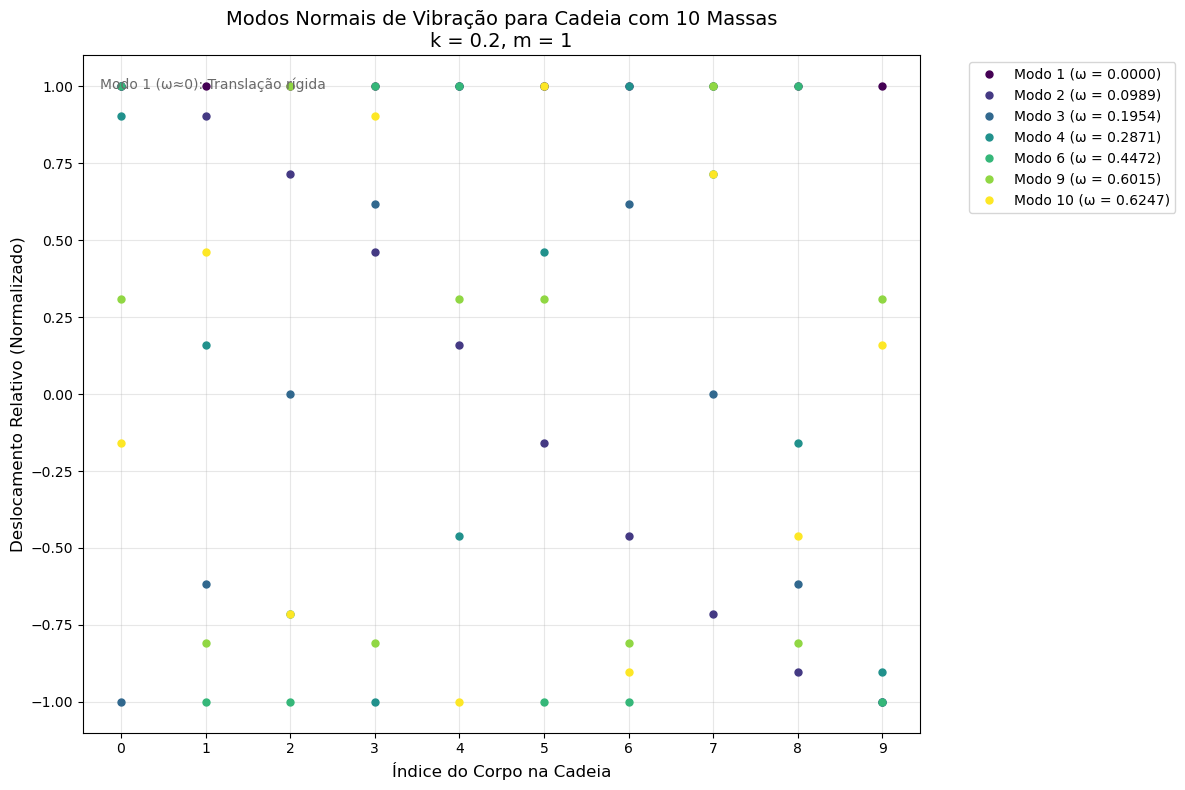

In [40]:
autovalores, autovetores = eigh(D)
frequencias = np.sqrt(np.maximum(autovalores, 0))  # Remove autovalores negativos

# Seleciona modos interessantes para plotar
modos_para_plotar = [0, 1, 2, 3, massas//2, massas-2, massas-1]  # Primeiros, médios e últimos modos

# Configuração do plot
plt.figure(figsize=(12, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(modos_para_plotar)))

# Plot dos modos selecionados
for idx, modo in enumerate(modos_para_plotar):
    deslocamento = autovetores[:, modo]
    # Normaliza o deslocamento para melhor visualização
    deslocamento_normalizado = deslocamento / np.max(np.abs(deslocamento))
    
    plt.plot(deslocamento_normalizado, 
             'o' if modo < 10 else 'x-',  # Estilo diferente para modos altos
             color=colors[idx],
             linewidth=1.5 if modo < 10 else 1,
             markersize=5 if modo < 10 else 4,
             label=f'Modo {modo+1} (ω = {frequencias[modo]:.4f})')

# Configurações do gráfico
plt.xlabel('Índice do Corpo na Cadeia', fontsize=12)
plt.ylabel('Deslocamento Relativo (Normalizado)', fontsize=12)
plt.title(f'Modos Normais de Vibração para Cadeia com {massas} Massas\nk = {k}, m = 1', fontsize=14)
plt.xticks(np.arange(0, massas, max(1, massas//10)))
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adiciona informação sobre os modos
plt.annotate(f'Modo 1 (ω≈0): Translação rígida',
             xy=(0.02, 0.95), xycoords='axes fraction',
             fontsize=10, color='dimgray')

plt.tight_layout()
plt.show()

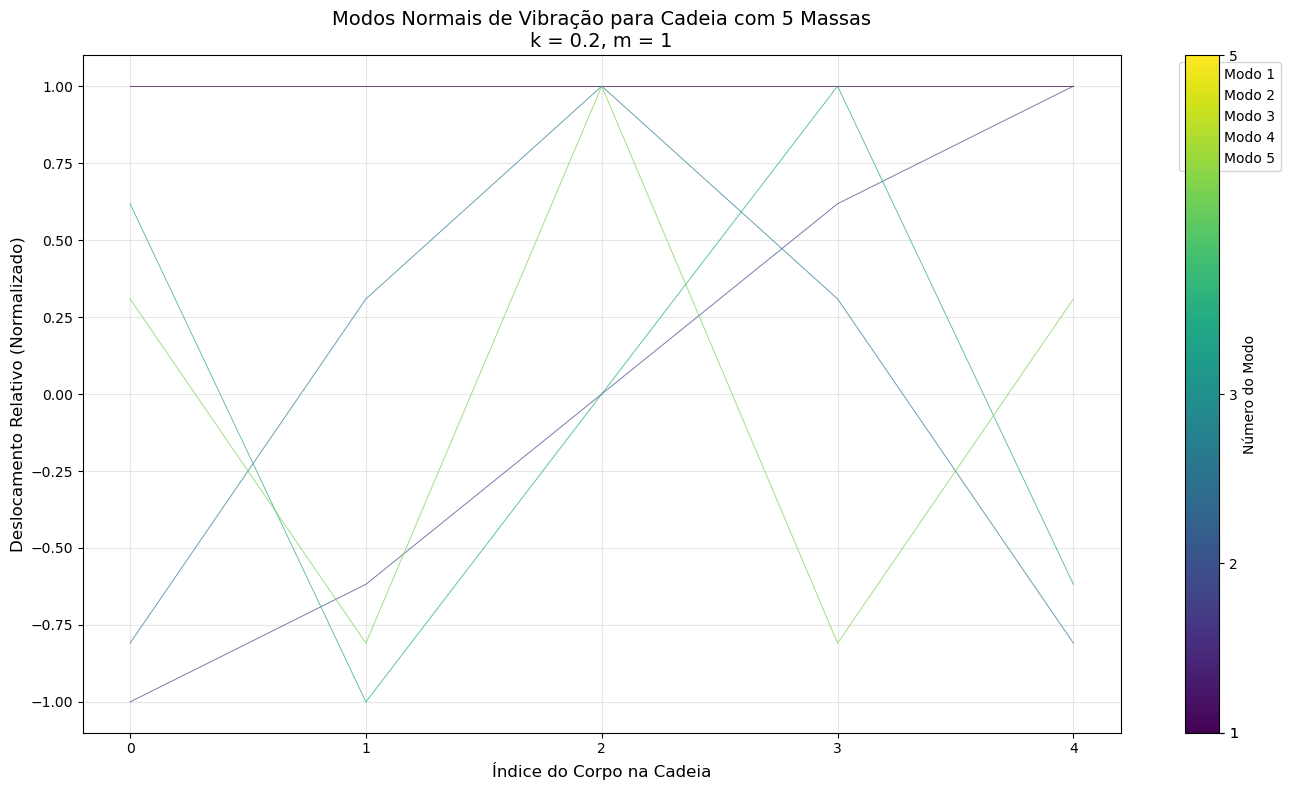

In [11]:
plt.figure(figsize=(14, 8))

# Plot de TODOS os modos normais
for modo in range(massas):
    deslocamento = autovetores[:, modo]
    deslocamento_normalizado = deslocamento / np.max(np.abs(deslocamento))
    
    # Usa cores do gradiente viridis
    color = plt.cm.viridis(modo/massas)
    
    plt.plot(deslocamento_normalizado, '-',
             color=color,
             linewidth=0.7,
             alpha=0.7,
             label=f'Modo {modo+1}' if modo < 10 else "")

# Configurações do gráfico
plt.xlabel('Índice do Corpo na Cadeia', fontsize=12)
plt.ylabel('Deslocamento Relativo (Normalizado)', fontsize=12)
plt.title(f'Modos Normais de Vibração para Cadeia com {massas} Massas\nk = {k}, m = 1', fontsize=14)
plt.xticks(np.arange(0, massas, max(1, massas//10)))
plt.grid(True, alpha=0.3)

# Mostra apenas os primeiros 10 modos na legenda para não poluir
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:10], labels[:10], bbox_to_anchor=(1.05, 1), loc='upper left')

# Adiciona barra de cores para indicar os modos
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=1, vmax=massas))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), label='Número do Modo')
cbar.set_ticks([1, massas//4, massas//2, 3*massas//4, massas])
cbar.set_ticklabels([1, massas//4, massas//2, 3*massas//4, massas])

plt.tight_layout()
plt.show()

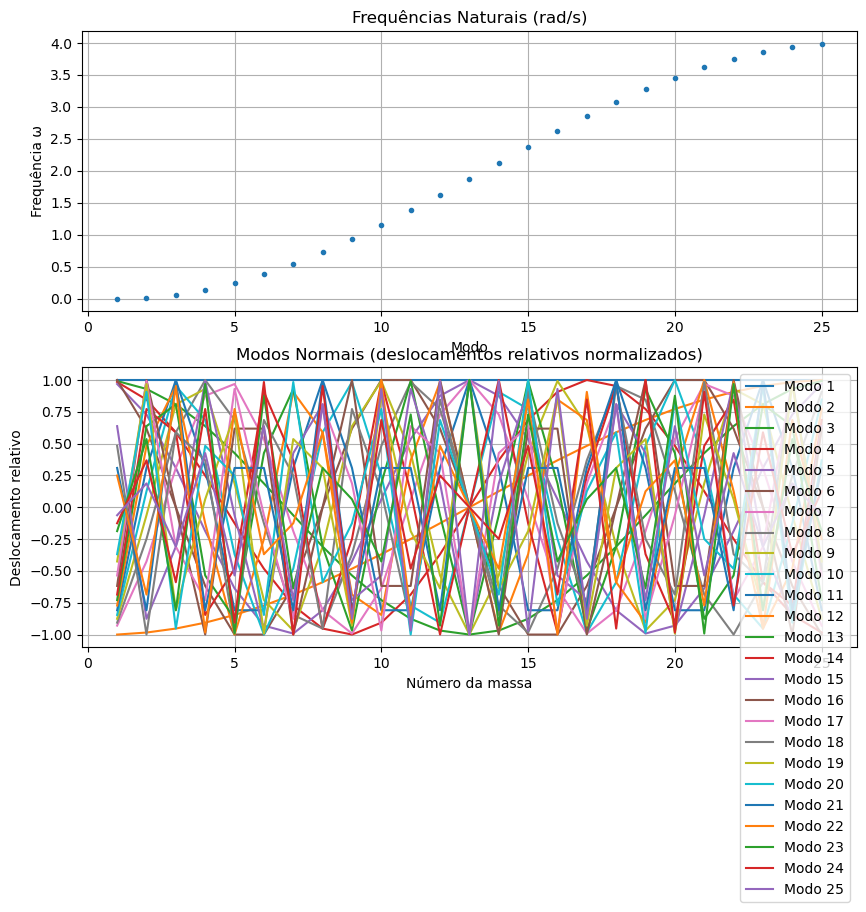

In [80]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
# Frequências naturais
axs[0].plot(range(1, massas+1), autovalores, marker='.', linestyle='')
axs[0].set_title('Frequências Naturais (rad/s)')
axs[0].set_xlabel('Modo')
axs[0].set_ylabel('Frequência ω')
axs[0].grid(True)

modos_normalizados = autovetores / np.max(np.abs(autovetores), axis=0)
for i in range(massas):
    axs[1].plot(range(1, massas+1), modos_normalizados[:, i], label=f'Modo {i+1}')
axs[1].set_title('Modos Normais (deslocamentos relativos normalizados)')
axs[1].set_xlabel('Número da massa')
axs[1].set_ylabel('Deslocamento relativo')
axs[1].legend()
axs[1].grid(True)

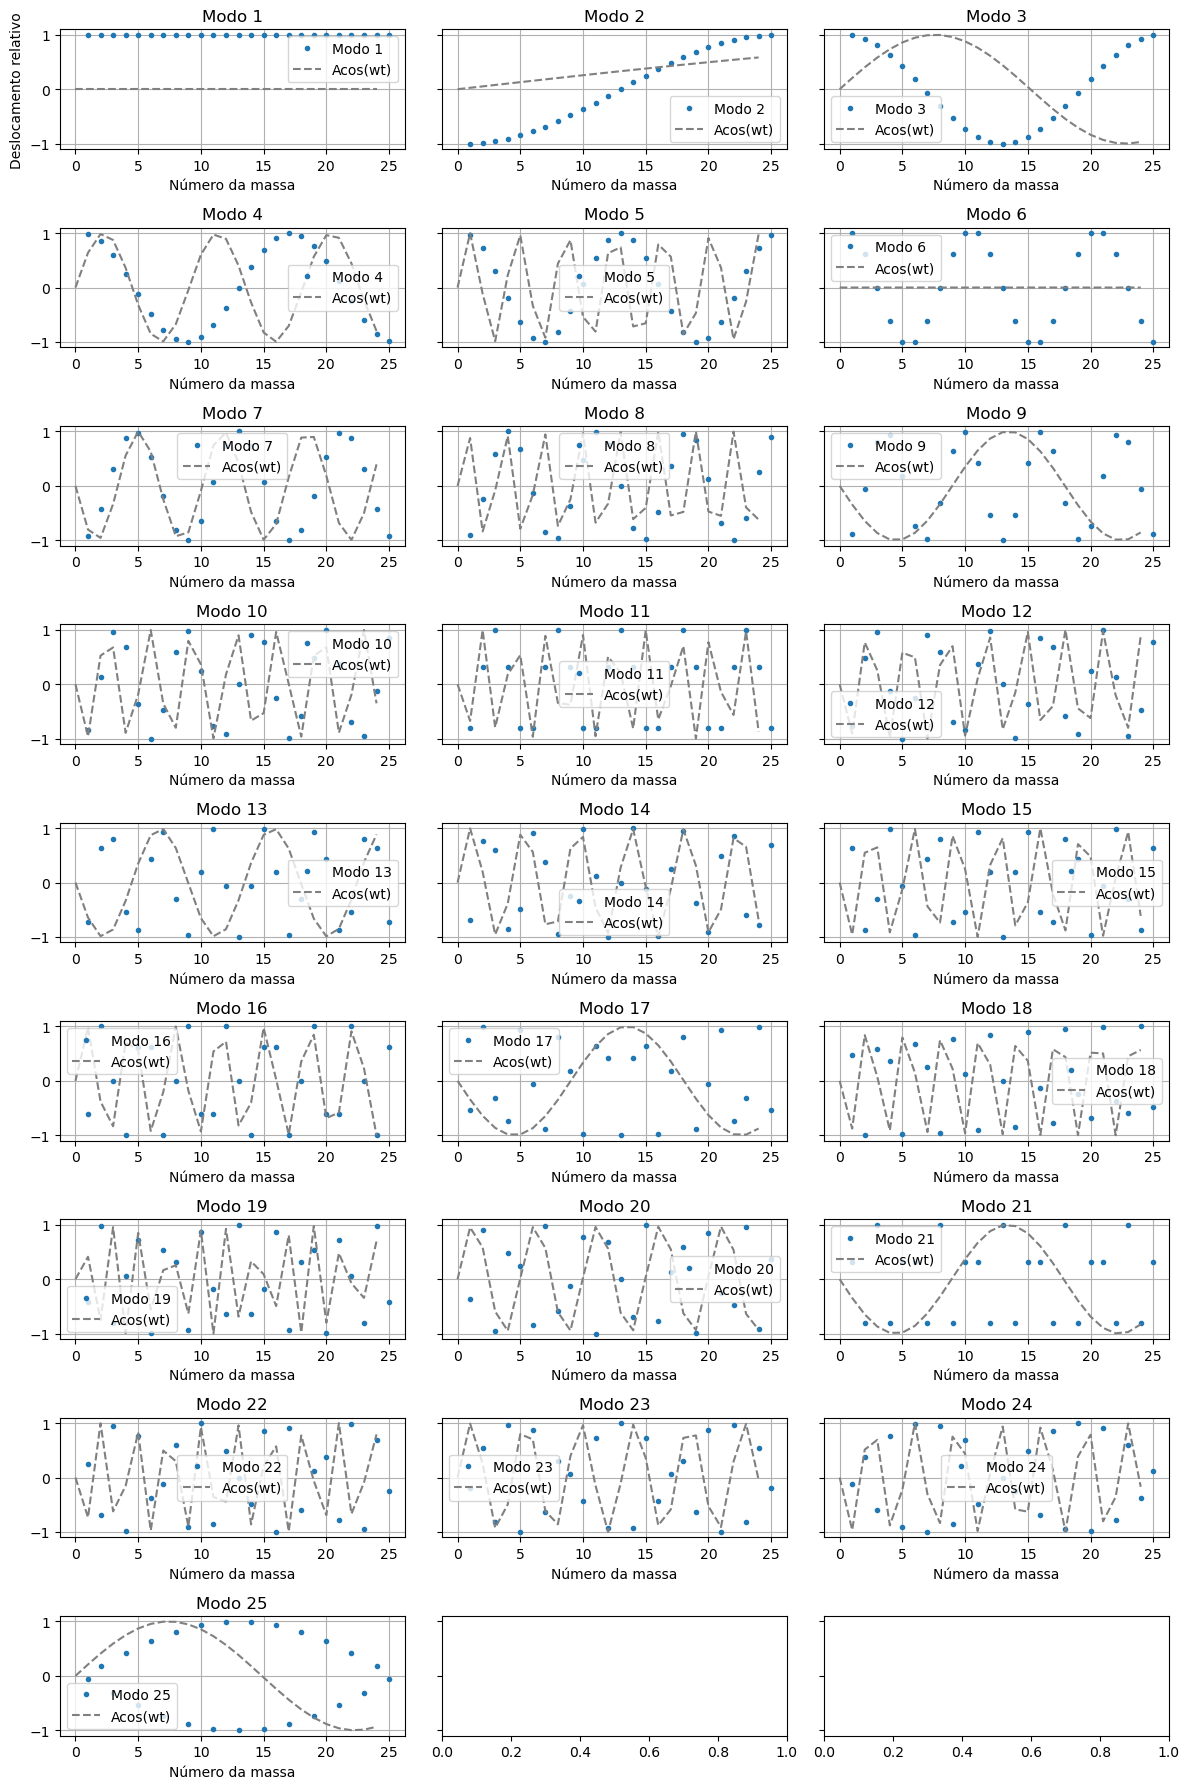

In [ ]:


# Normalização dos autovetores
modos_normalizados = autovetores / np.max(np.abs(autovetores), axis=0)

n_cols = int(np.ceil((np.sqrt(massas))/2))  
n_rows = int(np.ceil((massas) / n_cols))

# Criar figura com subplots individuais
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 2*n_rows), sharey=True)  # 1 linha, N colunas
axs = np.array(axs).reshape(-1)
 

#Acos(wt)
t = np.linspace(0, 2 * np.pi, massas)

# Plotar cada modo em um subplot separado
for i in range(massas):
    axs[i].plot(range(1, massas + 1), modos_normalizados[:, i], '.', label=f'Modo {i + 1}')
    axs[i].plot(np.sin(autovalores[i]*t*np.pi*i) , label='Acos(wt)', linestyle='--', color='gray')
    axs[i].set_title(f'Modo {i + 1}')
    axs[i].set_xlabel('Número da massa')
    axs[i].grid(True)
    axs[i].legend()

# Configuração comum do eixo y (opcional)
axs[0].set_ylabel('Deslocamento relativo')

plt.tight_layout()  # Ajusta espaçamento entre subplots
plt.show()

### Gŕaficos

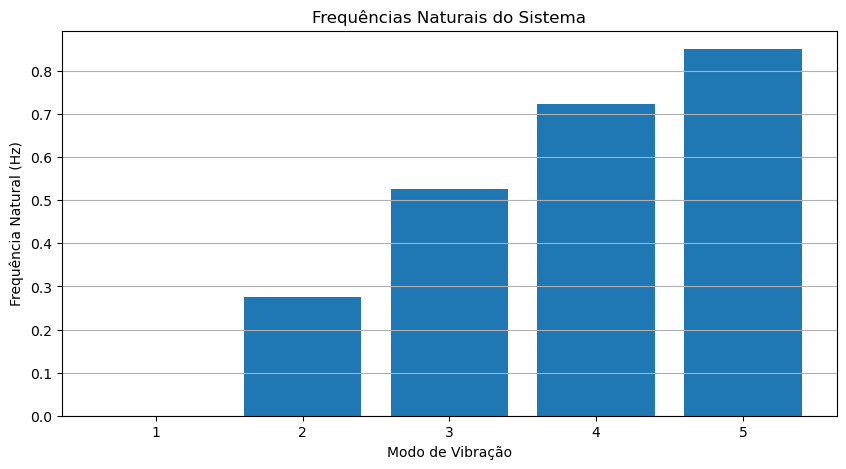

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(frequencias)+1), frequencias)
plt.xlabel('Modo de Vibração')
plt.ylabel('Frequência Natural (Hz)')
plt.title('Frequências Naturais do Sistema')
plt.grid(True, axis='y')
plt.show()